## Setup

In [ ]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/ADS/ubaar-data.csv')
print(df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(44052, 30)


In [ ]:
df.head(5)

,Load Type,Source City,Destination City,Source State,Destination State,Source Region,Destination Region,Who Added Role,Driver Income,Weight,...,Destination Lat,Destination Lng,Dispatch Time Delta,Pickup Date Time Delta,Order Channel,Packaging Type,Creation Datetime,Unload Option,Has Comments,Load Status
0,بار صنعتی,یزد,بندرعباس,یزد,هرمزگان,یزد,بندرعباس,anonymous,0.0,24.0,...,27.183222,56.266646,23.928889,NaN,NaN,hichkodam,2019-11-05 06:46:15.847289+00:00,NaN,0,reject_price
1,بار صنعتی,قزوین,رودسر,قزوین,گیلان,قزوین,چابکسر,anonymous,0.0,5.0,...,36.980067,50.531772,23.970278,NaN,NaN,hichkodam,2019-11-05 20:01:46.763769+00:00,NaN,0,reject_price
2,بار صنعتی,تهران,همدان,تهران,همدان,تهران,همدان,anonymous,0.0,2.0,...,34.798857,48.515023,23.962778,NaN,NaN,hichkodam,2019-11-06 09:13:13.686217+00:00,NaN,0,reject_price
3,بار صنعتی,آمل,گرگان,مازندران,گلستان,آمل,گرگان,anonymous,0.0,15.0,...,36.845643,54.439336,23.974722,NaN,NaN,hichkodam,2019-10-31 09:52:30.930302+00:00,NaN,0,reject_price
4,گلدان پلاستیکی,هشتگرد,اردبیل,البرز,اردبیل,پل کردان,اردبیل,baarbari,0.0,2.0,...,38.256645,48.317509,16.749444,68.358889,web,karton,2019-11-20 13:45:01.859383+00:00,day,0,delivered


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44052 entries, 0 to 44051
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Load Type               44052 non-null  object 
 1   Source City             44052 non-null  object 
 2   Destination City        44052 non-null  object 
 3   Source State            44052 non-null  object 
 4   Destination State       44052 non-null  object 
 5   Source Region           44052 non-null  object 
 6   Destination Region      44052 non-null  object 
 7   Who Added Role          44052 non-null  object 
 8   Driver Income           44052 non-null  float64
 9   Weight                  44052 non-null  float64
 10  Distance                44052 non-null  float64
 11  Duration                44052 non-null  float64
 12  Vehicle Type            44052 non-null  object 
 13  Vehicle Options         44052 non-null  object 
 14  Baarnameh Type          38366 non-null

In [ ]:
df.describe()

,Driver Income,Weight,Distance,Duration,Transport Cost,Source Lat,Source Lng,Destination Lat,Destination Lng,Dispatch Time Delta,Pickup Date Time Delta,Has Comments
count,4.405200e+04,44052.000000,44052.000000,44052.000000,4.405200e+04,44052.000000,44052.000000,44052.000000,44052.000000,44052.000000,2808.000000,44052.000000
mean,3.677479e+11,7.860764,486.471045,5.681138,3.677479e+11,34.751266,51.545719,34.018325,51.926935,28.755725,27.093312,0.362458
std,7.718487e+13,7.912958,440.643799,4.893344,7.718487e+13,2.201000,2.750519,3.039853,3.837871,59.757645,22.847216,0.480716
min,0.000000e+00,0.020000,0.000000,0.000000,0.000000e+00,24.494214,28.953026,24.494214,28.953026,-4.676944,0.006667,0.000000
25%,0.000000e+00,2.000000,50.000000,1.000000,0.000000e+00,33.640419,50.681933,32.198349,49.587414,3.048333,17.518611,0.000000
50%,1.800000e+05,4.000000,442.701000,4.861806,1.850000e+05,35.688905,51.388435,35.490586,51.388435,18.008333,21.120972,0.000000
75%,1.000000e+06,11.000000,817.966000,9.536319,1.000000e+06,35.837669,51.667983,36.271035,53.031317,24.240069,29.626528,1.000000
max,1.620000e+16,25.000000,2622.035000,28.618889,1.620000e+16,41.052112,69.870829,41.052112,69.870829,2204.550833,481.925000,1.000000


# EDA and Cleaning


## Getting Some Insights

In [ ]:
df['Packaging Type'].value_counts()

hichkodam      15319
karton         11464
falleh          6341
kiseh_gooni     5647
pallet          3443
roll            1042
bandil           796
Name: Packaging Type, dtype: int64

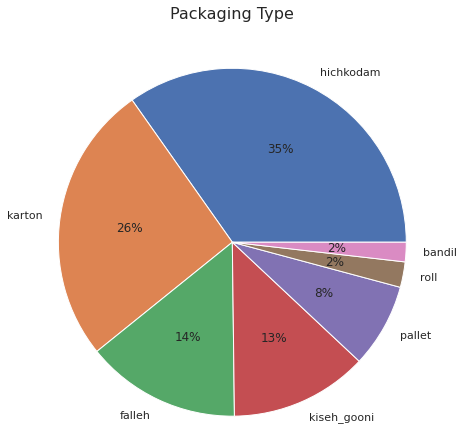

In [ ]:
  df['Packaging Type'].value_counts().plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
  plt.title('Packaging Type', y=1.5,fontsize=16)
  plt.show()


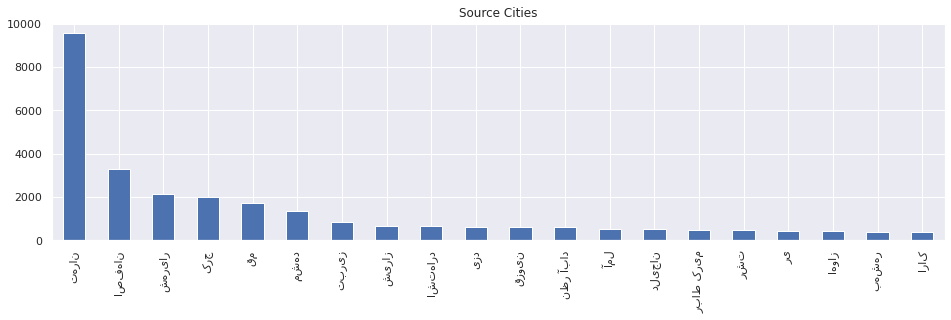

In [ ]:
df['Source City'].value_counts()[:20].plot.bar(figsize=(16, 4),title='Source Cities')

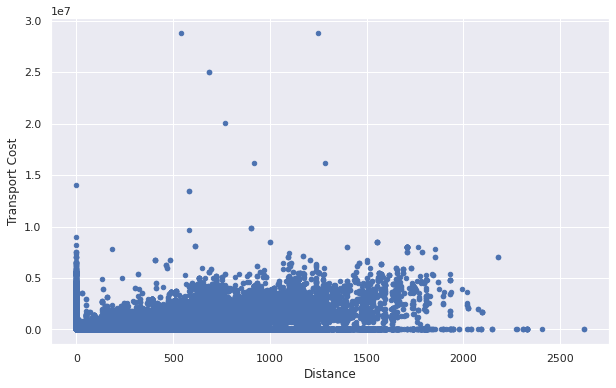

In [ ]:
df2 = df[df['Transport Cost'] < 1e10]  # Remove outlier
df2.plot(kind='scatter', x='Distance', y='Transport Cost', color='b',figsize=(10, 6))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


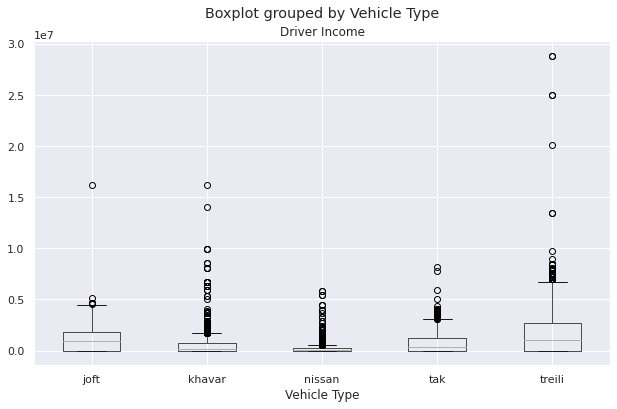

In [ ]:
df2 = df[df['Driver Income'] < 2e10]  # Remove outlier
df2.boxplot('Driver Income', by='Vehicle Type',figsize=(10, 6))

In [ ]:
df[df["Vehicle Type"] == "nissan"]['Order Channel'].value_counts()

android    5243
web        2120
Name: Order Channel, dtype: int64

In [ ]:
df[df["Vehicle Type"] == "nissan"]['Load Type'].value_counts()

میوه                       1612
بار صنعتی                  1517
اثاث منزل                  1204
مواد غذایی                  768
سایر                        535
                           ... 
دستگاه اسپرسو ساز صنعتی       1
گلدان                         1
تردمیل                        1
مخزن                          1
کالای خواب                    1
Name: Load Type, Length: 234, dtype: int64

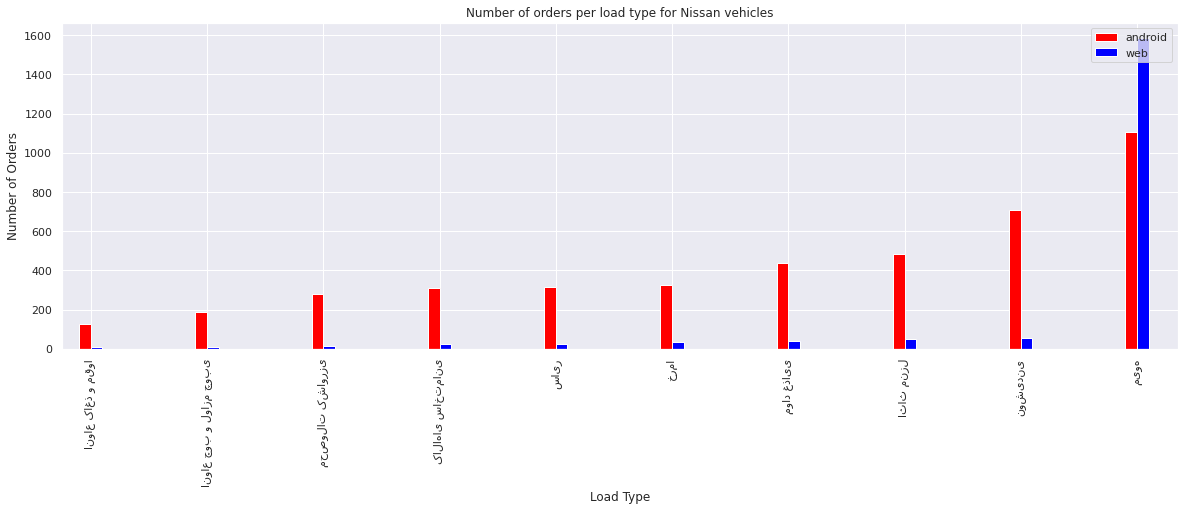

In [ ]:
fig = plt.figure(figsize=(20, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.1

load_types = df[df["Vehicle Type"] == "nissan"]['Load Type'].value_counts()[:10].index
colors = ["red", "orange", "blue", "green", "black"]


lns1 = df[(df["Vehicle Type"] == "nissan") & (df['Order Channel'] == 'android')].groupby(['Load Type']).size().sort_values()[-10:].plot(kind='bar', color='red', width=width, position=1,label="android")
lns1 = df[(df["Vehicle Type"] == "nissan") & (df['Order Channel'] == 'web')].groupby(['Load Type']).size().sort_values()[-10:].plot(kind='bar', color='blue', width=width, position=0,label="web")



ax.set_ylabel('Number of Orders')

plt.legend(loc='upper right')
ax.set_title('Number of orders per load type for Nissan vehicles')
plt.show()


## Data Cleaning

### Missing Values

In [ ]:
df.isnull().sum()

Load Type                     0
Source City                   0
Destination City              0
Source State                  0
Destination State             0
Source Region                 0
Destination Region            0
Who Added Role                0
Driver Income                 0
Weight                        0
Distance                      0
Duration                      0
Vehicle Type                  0
Vehicle Options               0
Baarnameh Type             5686
Transport Cost                0
Dispatch Date                 0
Dipatch Time                  0
Source Lat                    0
Source Lng                    0
Destination Lat               0
Destination Lng               0
Dispatch Time Delta           0
Pickup Date Time Delta    41244
Order Channel              8184
Packaging Type                0
Creation Datetime             0
Unload Option              6103
Has Comments                  0
Load Status                   0
dtype: int64

Almost all the rows miss the value of `Pickup Date Time Delta`. So we drop this column

In [ ]:
df.drop(['Pickup Date Time Delta'], axis=1, inplace=True)
df.shape

(44052, 29)

In [ ]:
df[df['Baarnameh Type'].isnull() | df['Order Channel'].isnull() | df['Unload Option'].isnull()]

,Load Type,Source City,Destination City,Source State,Destination State,Source Region,Destination Region,Who Added Role,Driver Income,Weight,...,Source Lng,Destination Lat,Destination Lng,Dispatch Time Delta,Order Channel,Packaging Type,Creation Datetime,Unload Option,Has Comments,Load Status
0,بار صنعتی,یزد,بندرعباس,یزد,هرمزگان,یزد,بندرعباس,anonymous,0.0,24.0,...,54.360979,27.183222,56.266646,23.928889,NaN,hichkodam,2019-11-05 06:46:15.847289+00:00,NaN,0,reject_price
1,بار صنعتی,قزوین,رودسر,قزوین,گیلان,قزوین,چابکسر,anonymous,0.0,5.0,...,50.012455,36.980067,50.531772,23.970278,NaN,hichkodam,2019-11-05 20:01:46.763769+00:00,NaN,0,reject_price
2,بار صنعتی,تهران,همدان,تهران,همدان,تهران,همدان,anonymous,0.0,2.0,...,51.388435,34.798857,48.515023,23.962778,NaN,hichkodam,2019-11-06 09:13:13.686217+00:00,NaN,0,reject_price
3,بار صنعتی,آمل,گرگان,مازندران,گلستان,آمل,گرگان,anonymous,0.0,15.0,...,52.350694,36.845643,54.439336,23.974722,NaN,hichkodam,2019-10-31 09:52:30.930302+00:00,NaN,0,reject_price
5,بار صنعتی,کازرون,تهران,فارس,تهران,قیروکازین,تهران,anonymous,0.0,5.0,...,52.959966,35.688905,51.388435,23.968056,NaN,hichkodam,2019-10-31 04:34:54.206605+00:00,NaN,0,reject_price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44035,بار صنعتی,یزد,تهران,یزد,تهران,یزد,تهران,anonymous,0.0,5.0,...,54.360979,35.688905,51.388435,23.973056,NaN,hichkodam,2019-11-01 20:01:36.927110+00:00,NaN,0,reject_price
44036,بار صنعتی,میناب,تهران,هرمزگان,تهران,میناب,شمال تهران,anonymous,0.0,10.0,...,57.067503,35.787602,51.425803,23.963056,NaN,hichkodam,2019-11-02 14:49:12.334306+00:00,NaN,0,reject_price
44037,بار صنعتی,فلاورجان,اهواز,اصفهان,خوزستان,قهدریجان,اهواز,anonymous,0.0,10.0,...,51.444482,31.326073,48.674809,23.982778,NaN,hichkodam,2019-10-31 04:00:01.257789+00:00,NaN,1,reject_price
44048,بار صنعتی,تهران,نور,تهران,مازندران,تهران,رویان,anonymous,0.0,2.0,...,51.388435,36.566512,51.960662,24.012500,NaN,hichkodam,2019-11-02 09:18:14.193466+00:00,NaN,0,reject_price


In [ ]:
df[df['Baarnameh Type'].isnull() | df['Order Channel'].isnull() | df['Unload Option'].isnull()].shape

(8184, 29)

For remaining missinng values, there is no easy way to estimate them or find them from external sources. In addition to that, we can see the rows with missing values from different columns have a large intersection. Therefore, by dropping all these rows we will not loose too much of the rows.

In [ ]:
df.dropna(inplace=True)
df.shape

(35868, 29)

### Invalid Data

In [ ]:
df.describe()

,Driver Income,Weight,Distance,Duration,Transport Cost,Source Lat,Source Lng,Destination Lat,Destination Lng,Dispatch Time Delta,Has Comments
count,3.586800e+04,35868.000000,35868.000000,35868.000000,3.586800e+04,35868.000000,35868.000000,35868.000000,35868.000000,35868.000000,35868.000000
mean,4.516569e+11,7.717787,478.915209,5.608270,4.516569e+11,34.752736,51.519125,33.997342,51.922903,29.046785,0.393136
std,8.553846e+13,7.894982,440.805794,4.905950,8.553846e+13,2.172747,2.741126,3.023800,3.840593,63.479663,0.488453
min,0.000000e+00,0.020000,0.000000,0.000000,0.000000e+00,24.494214,28.953026,24.494214,28.953026,-4.676944,0.000000
25%,0.000000e+00,2.000000,50.000000,0.866111,0.000000e+00,33.691995,50.619571,32.056827,49.587414,2.028333,0.000000
50%,3.840000e+05,4.000000,419.147000,4.809722,3.800000e+05,35.670677,51.388435,35.458503,51.388435,14.916111,0.000000
75%,1.212000e+06,11.000000,804.962000,9.476944,1.210000e+06,35.837669,51.696110,36.271035,53.031317,24.394167,1.000000
max,1.620000e+16,25.000000,2622.035000,28.618889,1.620000e+16,41.052112,69.870829,41.052112,69.870829,2204.550833,1.000000


* `Lat, Lng` columns seem okay. The values are within Iran.
* `Has Comments` is okay. It is a boolean column.
* `Weight` seems okay. The range of values is [0.02, 25] perhaps in 1K Kgs scale.
* `Dispatch Time Delta` has negative values and also very large values. Needs more investigation.
* The columns `Driver Income, Distance, Duration, Transport Cost` have zero min. It is not possible for a valid real order. Is it a king of missing value indicator? Needs more investigation.
* The `1e16` seems off as the maximum value for `Driver Income` and `Transport Cost`. Does not feel real.

In [ ]:
df[['Dispatch Date', 'Dipatch Time', 'Creation Datetime', 'Dispatch Time Delta']]

,Dispatch Date,Dipatch Time,Creation Datetime,Dispatch Time Delta
4,1398-08-30,10:00:00,2019-11-20 13:45:01.859383+00:00,16.749444
8,1398-07-23,11:30:00,2019-10-15 07:35:48.686186+00:00,0.403056
9,1398-08-04,8:00:00,2019-10-24 13:12:40.461622+00:00,39.288611
10,1398-08-16,10:00:00,2019-11-06 17:01:01.501348+00:00,13.482778
14,1398-08-11,15:00:00,2019-11-02 07:24:31.415289+00:00,4.091111
...,...,...,...,...
44045,1398-08-10,11:00:00,2019-10-29 05:00:23.122293+00:00,74.493333
44046,1398-08-16,12:30:00,2019-11-07 05:07:52.473923+00:00,3.868611
44047,1398-08-09,3:00:00,2019-10-30 23:18:56.706587+00:00,0.184167
44050,1398-08-16,9:30:00,2019-11-07 05:37:41.824758+00:00,0.371667


We can see no clue from other datetime fields to decide whether negative values for `Dispatch Time Delta` are invalid. So we leave it there.

In [ ]:
print(df[df['Duration'] ==0].shape)
print(df[(df['Duration'] ==0) | (df['Distance'] ==0)].shape)
print(df[df['Transport Cost'] ==0].shape)
print(df[(df['Transport Cost'] ==0) | (df['Driver Income'] ==0)].shape)
print(df[(df['Transport Cost'] ==0) | (df['Duration'] ==0)].shape)

(6841, 29)
(6841, 29)
(12895, 29)
(12895, 29)
(16355, 29)


In [ ]:
df[df['Distance'] ==0]['Load Status'].value_counts()

reject_price    2961
notfound        2749
cancelled        915
delivered        158
pickedup          58
Name: Load Status, dtype: int64

In [ ]:
df[df['Transport Cost'] == 0]['Load Status'].value_counts()

reject_price    10135
notfound         2119
cancelled         600
delivered          26
pickedup           15
Name: Load Status, dtype: int64

As we can see the pair of columns `Driver Income` and `Transport Cost` and the pair of `Distance` and `Duration` are zero at the same time.

Dropping these rows almost cuts the dataset size in half. Taking such a decision is dependent on the analysis objective. For example, if the neccessary API is provided distance can be calculated based on source and destination points.

For now, we drop such rows.

In [ ]:
df.drop(df[(df['Transport Cost'] ==0) | (df['Duration'] ==0)].index, inplace=True)
df.shape

(19513, 29)

### Dealing with outliers

As we stated before, there seems to be some odd large values for `Transport Cost'. Lets look closer.

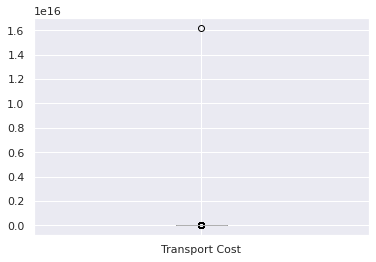

In [ ]:
df.boxplot(column=['Transport Cost'])

Okay! Let's get rid of this really odd record!

In [ ]:
df = df[df['Transport Cost'] < 1e10]


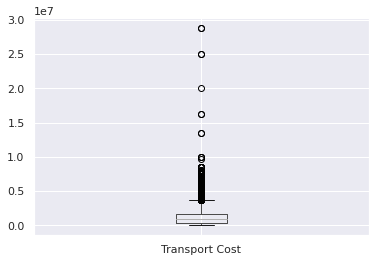

In [ ]:
df.boxplot(column=['Transport Cost'])

Still there are some outliers. Let's go more aggressive.

In [ ]:
col = ['Transport Cost']
Q1 = df[col].quantile(0.1)  # Find first quantile range
Q4 = df[col].quantile(0.9)  # and 5th quantile range
IQR = Q4 - Q1
df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q4 + 1.5 * IQR))).any(axis=1)]

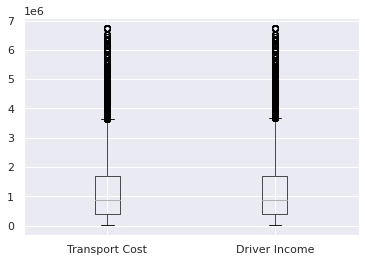

In [ ]:
df.boxplot(column=['Transport Cost', 'Driver Income'])

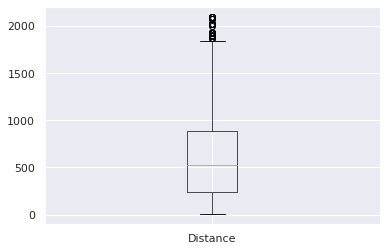

In [ ]:
df.boxplot(column=['Distance'])


Now things look okay!

## Data Preproccessing

In [ ]:
df.columns

Index(['Load Type', 'Source City', 'Destination City', 'Source State',
       'Destination State', 'Source Region', 'Destination Region',
       'Who Added Role', 'Driver Income', 'Weight', 'Distance', 'Duration',
       'Vehicle Type', 'Vehicle Options', 'Baarnameh Type', 'Transport Cost',
       'Dispatch Date', 'Dipatch Time', 'Source Lat', 'Source Lng',
       'Destination Lat', 'Destination Lng', 'Dispatch Time Delta',
       'Order Channel', 'Packaging Type', 'Creation Datetime', 'Unload Option',
       'Has Comments', 'Load Status'],
      dtype='object')

DateTime columns!

In [ ]:
!pip install jdatetime

df['Creation Datetime'] = pd.to_datetime(df['Creation Datetime'])

import jdatetime as jdt
def read_dispatch_datetime(x):
  t = x['Dipatch Time']
  if len(t) < 8:
    t = '0' + t
  return jdt.datetime.strptime(x['Dispatch Date'] + 'T' + t, "%Y-%m-%dT%H:%M:%S").togregorian()

df['Dispatch Datetime'] = df.apply(read_dispatch_datetime, axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df[['Creation Datetime', 'Dispatch Datetime']].head()

,Creation Datetime,Dispatch Datetime
8,2019-10-15 07:35:48.686186+00:00,2019-10-15 11:30:00
9,2019-10-24 13:12:40.461622+00:00,2019-10-26 08:00:00
14,2019-11-02 07:24:31.415289+00:00,2019-11-02 15:00:00
16,2019-11-16 16:46:24.042161+00:00,2019-11-16 22:00:00
17,2019-12-11 11:14:22.545866+00:00,2019-12-12 04:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19455 entries, 8 to 44050
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Load Type            19455 non-null  object             
 1   Source City          19455 non-null  object             
 2   Destination City     19455 non-null  object             
 3   Source State         19455 non-null  object             
 4   Destination State    19455 non-null  object             
 5   Source Region        19455 non-null  object             
 6   Destination Region   19455 non-null  object             
 7   Who Added Role       19455 non-null  object             
 8   Driver Income        19455 non-null  float64            
 9   Weight               19455 non-null  float64            
 10  Distance             19455 non-null  float64            
 11  Duration             19455 non-null  float64            
 12  Vehicle Type      

# Feature Engineering

## Feture Construction/Extraction

### Combining columns

We have lat/lng values from source and destination. We can use them to calculate geodesic distance between source and destination. We utilize `geopy` package.

In [ ]:
!pip install geopy
from geopy import distance


def geo_distance(input_df):
  return distance.distance(
      (input_df['Source Lat'], input_df['Source Lng']),
      (input_df['Destination Lat'], input_df['Destination Lng'])
  ).km

df['Geo Distance'] = df.apply(geo_distance, axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


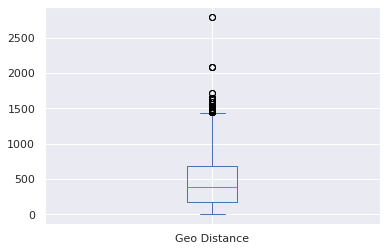

In [ ]:
df['Geo Distance'].plot.box()

Now let's combine vehicle type and packaging type

In [ ]:
df['Vehicle/Packaging Type'] = df[['Vehicle Type', 'Packaging Type']].agg('_'.join, axis=1)
df['Vehicle/Packaging Type'].value_counts()[:10]

khavar_karton         2695
nissan_hichkodam      2091
khavar_hichkodam      1667
nissan_karton         1280
treili_falleh         1027
treili_pallet          949
treili_hichkodam       778
khavar_kiseh_gooni     731
joft_falleh            670
tak_hichkodam          653
Name: Vehicle/Packaging Type, dtype: int64

### Splitting Columns

Split creation datetime

In [ ]:
# Now, let's breake the dates into several different columns
df['CYear'] = df['Creation Datetime'].dt.year
df['CMonth'] = df['Creation Datetime'].dt.month
df['CDay'] = df['Creation Datetime'].dt.day
df['CSeason'] = df['Creation Datetime'].dt.quarter
df['CDay_of_Week'] = df['Creation Datetime'].dt.dayofweek    # Monday=0, Sunday=6

# Let's convert the date into numerical value
df['CTimestamp'] = df['Creation Datetime'].astype('int64') // 10**9    # Convert date to timestamp (an integer)

df[['Creation Datetime','CYear','CMonth','CDay','CDay_of_Week','CSeason','CTimestamp']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  if __name__ == '__main__':


,Creation Datetime,CYear,CMonth,CDay,CDay_of_Week,CSeason,CTimestamp
8,2019-10-15 07:35:48.686186+00:00,2019,10,15,1,4,1571124948
9,2019-10-24 13:12:40.461622+00:00,2019,10,24,3,4,1571922760
14,2019-11-02 07:24:31.415289+00:00,2019,11,2,5,4,1572679471
16,2019-11-16 16:46:24.042161+00:00,2019,11,16,5,4,1573922784
17,2019-12-11 11:14:22.545866+00:00,2019,12,11,2,4,1576062862


### Ratio

Income by distance

In [ ]:
df['Duration_per_KM'] = df['Duration'] / df['Distance']

We can investigate if the duration per KM has changed over time.

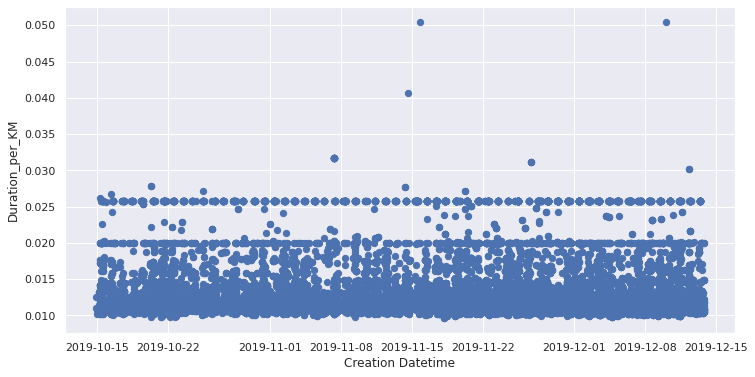

In [ ]:
df.plot(kind = 'scatter', y='Duration_per_KM',x='Creation Datetime',figsize=(12,6), s=40)

As we can see the time window of the data is narrow and not much relation with can be identified. Let's see its relation with weight.

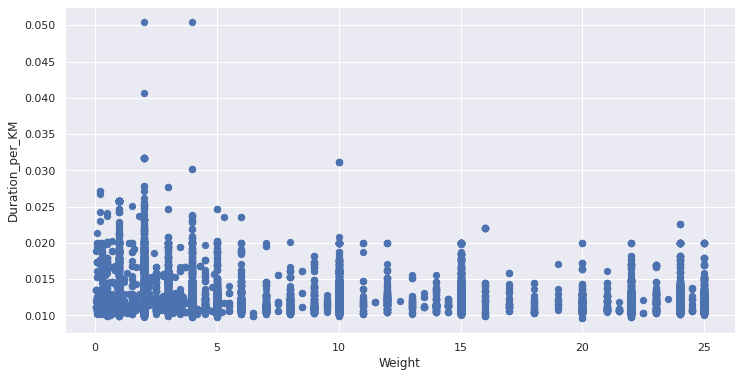

In [ ]:
df.plot(kind = 'scatter', y='Duration_per_KM',x='Weight',figsize=(12,6), s=40)

### Bining

As we can see in the figure above, values from weight column are somehow discrete. Therefore, its a good choice for binning.

In [ ]:
no_bins = 10
bin_step = int((df['Weight'].max() - df['Weight'].min())/no_bins)
bins = np.arange(int(df['Weight'].min()), int(df['Weight'].max()) + 1, bin_step)
labels = np.arange(1,len(bins))
df['Binned_Weight'] = pd.cut(df['Weight'], bins=bins, labels=labels)


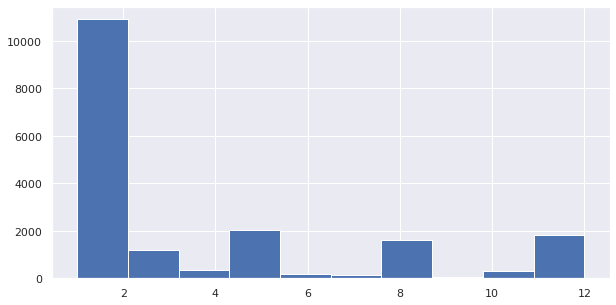

In [ ]:
df['Binned_Weight'].hist(figsize=(10,5))

### Mathematical Function of a Column

We have removed outliers. Here let's visualize relations between important numerical attributes.

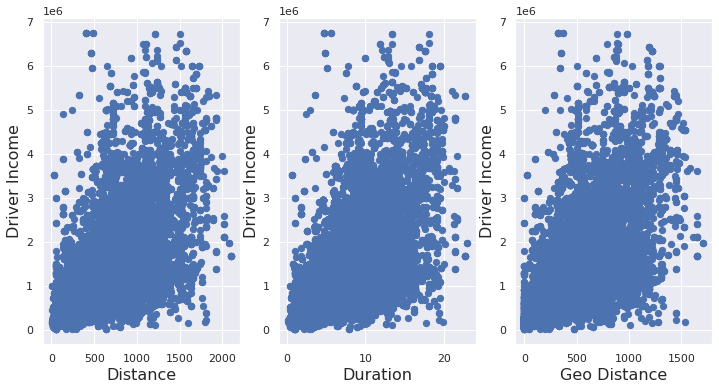

In [ ]:
# Create two subplots
df = df[df['Geo Distance'] < 2000]
fig, axes = plt.subplots(nrows=1, ncols=3)

# Plot the variables
df.plot(ax=axes[0], kind = 'scatter', y='Driver Income',x='Distance',figsize=(12,6),stacked=True,s=40)
df.plot(ax=axes[1], kind = 'scatter', y='Driver Income',x='Duration',figsize=(12,6),stacked=True,s=40)
df.plot(ax=axes[2], kind = 'scatter', y='Driver Income',x='Geo Distance',figsize=(12,6),stacked=True,s=40)

# Now let's setup the labels, titles and format y axis as percentages
axes[0].set_xlabel('Distance',fontsize=16)
axes[0].set_ylabel('Driver Income',fontsize=16)

axes[1].set_xlabel('Duration',fontsize=16)
axes[1].set_ylabel('Driver Income',fontsize=16)

axes[2].set_xlabel('Geo Distance',fontsize=16)
axes[2].set_ylabel('Driver Income',fontsize=16)


plt.show()



OK. It seems higher powers of selected attributes have a more linear relation with target.

In [ ]:
df['Distance_Sq'] = np.power(df['Distance'], 2)
df['GeoDistance_Sq'] = np.power(df['Geo Distance'], 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


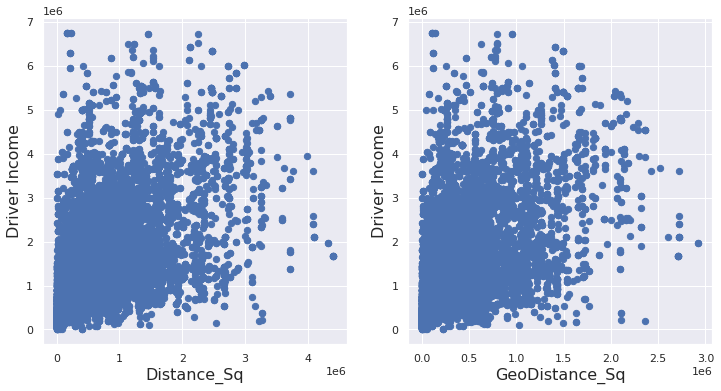

In [ ]:
# Create two subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot the variables
df.plot(ax=axes[0], kind = 'scatter', y='Driver Income',x='Distance_Sq',figsize=(12,6),stacked=True,s=40)
df.plot(ax=axes[1], kind = 'scatter', y='Driver Income',x='GeoDistance_Sq',figsize=(12,6),stacked=True,s=40)

# Now let's setup the labels, titles and format y axis as percentages
axes[0].set_xlabel('Distance_Sq',fontsize=16)
axes[0].set_ylabel('Driver Income',fontsize=16)

axes[1].set_xlabel('GeoDistance_Sq',fontsize=16)
axes[1].set_ylabel('Driver Income',fontsize=16)


plt.show()

### Domain Knowledge


Whether the source and the destination are in the same province (state) can have many implications.

In [ ]:
df['Same_State'] = df['Source State'] == df['Destination State']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Also we may be interested in dispatches at night!

In [ ]:
df['Dispatch_At_Night'] = df.apply(lambda x: x['Dispatch Datetime'].hour > 19, axis=1)

### Aggregation

We look at drivers income grouped by load type and distance of shippings grouped by vehicle type.

In [ ]:
df['Distance_Avg_Vehicle_Group'] = df['Distance'].groupby(df['Vehicle Type']).transform('mean')
df['Distance_Avg_Group_Ratio'] = df['Distance']/df['Distance_Avg_Vehicle_Group']

df[['Vehicle Type','Distance','Distance_Avg_Vehicle_Group','Distance_Avg_Group_Ratio']].head(10)

,Vehicle Type,Distance,Distance_Avg_Vehicle_Group,Distance_Avg_Group_Ratio
8,khavar,1014.692,595.521628,1.703871
9,joft,277.948,665.821761,0.417451
14,khavar,299.318,595.521628,0.502615
16,nissan,1154.497,278.472887,4.145815
17,nissan,29.471,278.472887,0.105831
18,nissan,203.412,278.472887,0.730455
19,treili,737.074,770.370169,0.956779
32,khavar,642.362,595.521628,1.078654
33,nissan,900.846,278.472887,3.234950
38,joft,535.640,665.821761,0.804480


### Target Encoding

Now we try to encode vehicle type by average distance.

In [ ]:
# "Smart" categorical encoding
means = df.groupby('Vehicle Type')['Driver Income'].mean()

df['Vehicle_Income_Mean'] = df['Vehicle Type'].map(means)
df.sort_values(by=['Vehicle_Income_Mean'], ascending=True,inplace=True)

df['Vehicle_Target_Encoded'] = df['Vehicle_Income_Mean'].astype('category').cat.codes

In [ ]:
df.sort_values(by=['Creation Datetime'], ascending=True,inplace=True)
df[['Vehicle Type','Driver Income','Vehicle_Income_Mean','Vehicle_Target_Encoded']].head(10)

,Vehicle Type,Driver Income,Vehicle_Income_Mean,Vehicle_Target_Encoded
22871,treili,3650000.0,2.589724e+06,4
21076,joft,2800000.0,1.693002e+06,3
21132,treili,5000.0,2.589724e+06,4
21497,khavar,685000.0,7.931178e+05,1
21157,tak,840000.0,1.258561e+06,2
21152,tak,840000.0,1.258561e+06,2
1078,tak,1429000.0,1.258561e+06,2
312,tak,1429000.0,1.258561e+06,2
1168,treili,2400000.0,2.589724e+06,4
380,treili,2400000.0,2.589724e+06,4


## Feature Selection

In [ ]:
# Cleaning
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

df["Dispatch Datetime"] = df["Dispatch Datetime"].values.astype(np.int64)
df = df.drop(["Transport Cost", "Creation Datetime", "Vehicle_Income_Mean"], axis=1)
df = df.dropna(axis=0)

Here let's focus on income as the target.

In [ ]:
target_column = df.pop("Driver Income")

### Mutual Information

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
feature_selector = SelectKBest(score_func=mutual_info_regression, k = 'all').fit(df,target_column)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


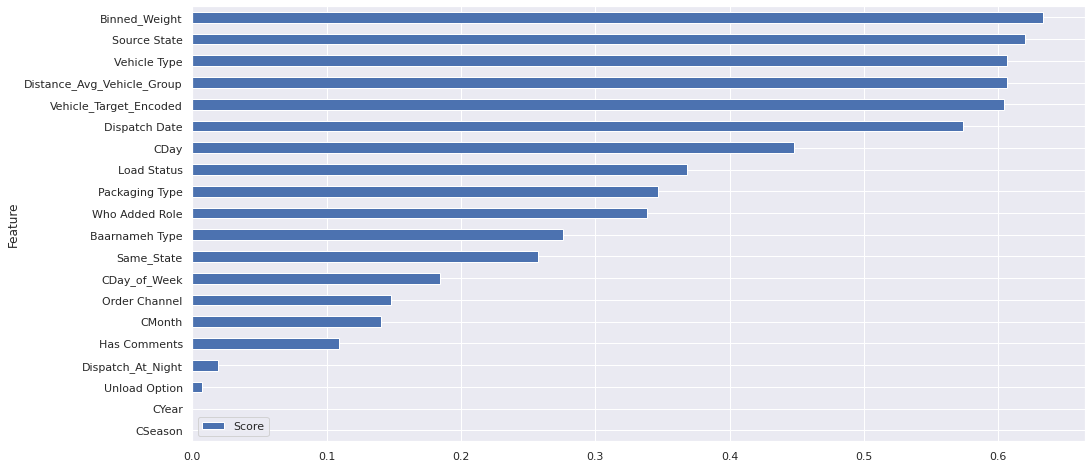

In [ ]:
feature_scores = pd.DataFrame({'Feature':df.columns,'Score':feature_selector.scores_})
feature_scores.sort_values(by=['Score'],inplace=True)

feature_scores[0:20].plot(x='Feature',y='Score',kind='barh',figsize=(16,8))

It is surprising to observe the high mutual information between our target and source state.

### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
normalized_df = StandardScaler().fit_transform(df)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
principalComponents = pca.fit_transform(normalized_df)
df_pca = pd.DataFrame(data = normalized_df)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-0.549225,-0.809489,-0.843980,-1.083782,-1.763720,-0.821824,-0.791674,-0.719877,2.386845,2.822008,...,-2.049519,-0.610338,2.354345,4.192326,4.182176,-0.448149,-0.253743,1.152212,1.610713,1.680671
1,-0.549225,-0.786734,-0.829263,-0.931917,-1.623918,-0.808654,-0.781101,-0.719877,1.129750,2.273830,...,-2.047996,-0.253384,1.219087,2.969678,3.009783,-0.448149,-0.253743,0.538329,1.629039,0.961949
2,-0.543467,-0.763978,-0.814547,-0.780052,-1.484116,-0.795484,-0.770529,-0.719877,-0.825732,-0.695499,...,-2.041029,-0.686190,-0.767613,-0.693162,-0.645779,-0.448149,-0.253743,1.152212,-0.804095,1.680671
3,-0.537709,-0.763978,-0.799830,-0.780052,-1.344314,-0.795484,-0.759956,-0.719877,-0.825732,-0.004276,...,-2.040803,-0.797188,-0.767613,-0.286747,-0.168670,-0.448149,-0.253743,0.125543,-0.050802,-0.475496
4,-0.531952,-0.741223,-0.785113,-0.628188,-1.204513,-0.782313,-0.749383,-0.719877,0.431363,-0.300648,...,-2.035936,-0.714748,0.367644,-0.494166,-0.486911,-0.448149,-0.253743,0.591402,-0.427450,0.243226


Text(0.5, 1.0, ' ')

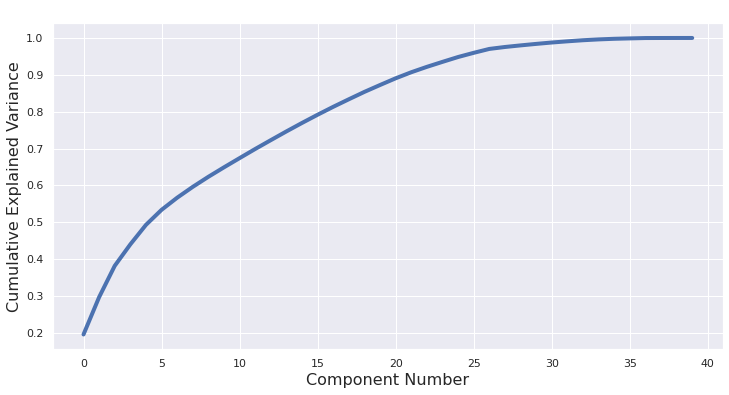

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),lw=4)
plt.xlabel('Component Number',fontsize=16)
plt.ylabel('Cumulative Explained Variance',fontsize=16)
plt.title(' ')


As we can see, by around 25 components we can explain all of the variance.